# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from joblib import dump, load

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [2]:
df = pd.read_csv('../data/dayofweek.csv')

X = df.drop(columns=['dayofweek'])
y = df['dayofweek']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print("Train set:")
print(y_train.value_counts())

print("\nTest set:")
print(y_test.value_counts())

Train set:
dayofweek
3    313
6    287
1    222
5    216
2    125
0    105
4     80
Name: count, dtype: int64

Test set:
dayofweek
3    83
6    69
5    55
1    52
0    31
4    24
2    24
Name: count, dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

print("\nTrain set (stratified):")
print(y_train.value_counts())

print("\nTest set (stratified):")
print(y_test.value_counts())


Train set (stratified):
dayofweek
3    316
6    285
1    219
5    217
2    119
0    109
4     83
Name: count, dtype: int64

Test set (stratified):
dayofweek
3    80
6    71
1    55
5    54
2    30
0    27
4    21
Name: count, dtype: int64


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [5]:
model = LogisticRegression(fit_intercept=False, random_state=21)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6568


### b. SVM

In [6]:
model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with linear kernel: {accuracy:.4f}')

Accuracy with linear kernel: 0.6509


### c. Decision tree

In [7]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with max_depth = 4: {accuracy:.4f}')

Accuracy with max_depth = 4: 0.5503


### d. Random forest

In [8]:
model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with n_estimators = 100, max_depth = 25: {accuracy:.4f}')

Accuracy with n_estimators = 100, max_depth = 25: 0.9083


## All models showed a decrease in the metric. Largest difference: Random Forest (0.99 - 0.9)

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [9]:
model = LogisticRegression(solver='liblinear', random_state=21, fit_intercept=False)
scores = cross_val_score(model, X_train, y_train, cv=10)
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print(f'Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}')

Accuracy: 0.6372 +/- 0.0214


### b. SVM

In [10]:
model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
scores = cross_val_score(model, X_train, y_train, cv=10)
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print(f'Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}')

Accuracy: 0.6201 +/- 0.0352


### c. Decision tree

In [11]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
scores = cross_val_score(model, X_train, y_train, cv=10)
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print(f'Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}')

Accuracy: 0.5134 +/- 0.0339


### d. Random forest

In [12]:
model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
scores = cross_val_score(model, X_train, y_train, cv=10)
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print(f'Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}')

Accuracy: 0.8850 +/- 0.0255


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [13]:
# Gridsearch with cross validation for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None]
}

rf_model = RandomForestClassifier(random_state=21)
grid_search = GridSearchCV(rf_model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=21),
             param_grid={'max_depth': [10, 20, 30, None],
                         'n_estimators': [50, 100, 200]})

In [14]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_rf_model = grid_search.best_estimator_
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'max_depth': 30, 'n_estimators': 100}
Best Score: 0.8931288004422331
Test Accuracy: 0.908284023668639


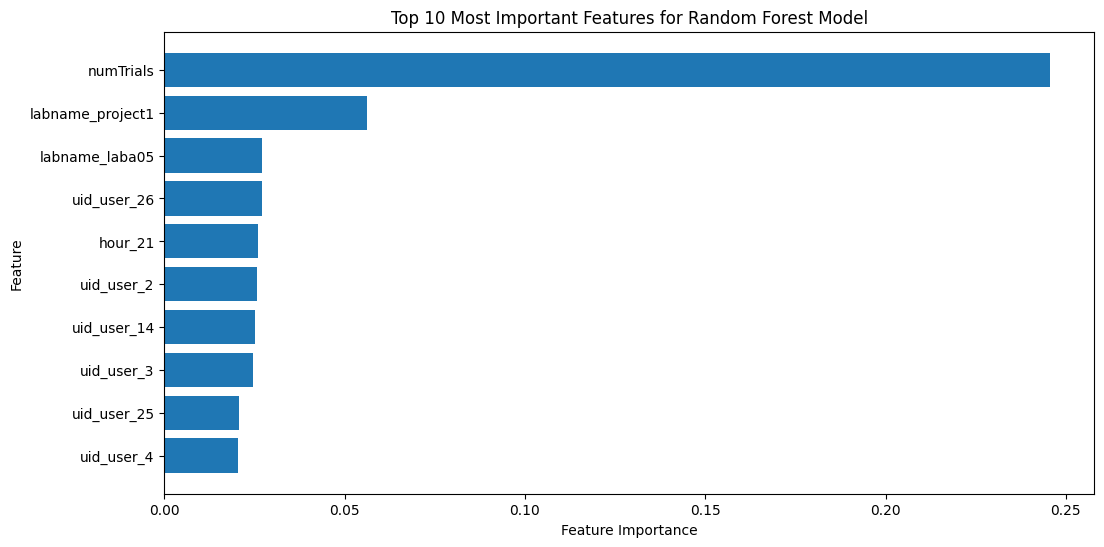

In [15]:
feature_importances = best_rf_model.feature_importances_
top_features_indices = np.argsort(feature_importances)[::-1][:10]
top_feature_names = X_train.columns[top_features_indices]
plt.figure(figsize=(12, 6))
plt.barh(range(10), feature_importances[top_features_indices], align='center')
plt.yticks(range(10), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features for Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [16]:
# Save the model
dump(best_rf_model, '../data/best_rf_model.joblib')

['../data/best_rf_model.joblib']

In [17]:
# Load the model and make predictions
model = load('../data/best_rf_model.joblib')
test_predictions = model.predict(X_test)
accuracy = np.mean(test_predictions == y_test)
print("Test Accuracy (after loading model):", accuracy)

Test Accuracy (after loading model): 0.908284023668639
